# <span style="color:orange"> Numerical Simulation Laboratory </span>
## <span style="color:purple"> Python Exercise 12: Keras - Deep & Convolutional Neural Network image recognition </span>


The goal of exercise 12 is to use deep and convolutional neural network models, implemented in the Keras python package, to recognize and distinguish between the ten handwritten digits (0-9).

To do that, we Will use the MNIST dataset that comprises $70000$ handwritten digits, each of which comes in a square image, divided into a $28\times 28$ pixel grid. Every pixel can take on $256$ gradation of the gray color, interpolating between white and black, and hence each data point assumes any value in the set $\{0,1,\dots,255\}$.

 Since there are $10$ categories in the problem, corresponding to the ten digits, this problem represents a generic classification task.

Below is the 'architecture of the neural network that we are going to modify in exercises $12.1$ and $12.2$ .

X_train shape: (60000, 28, 28)
Y_train shape: (60000,)
X_train shape: (60000, 784)
X_test shape: (10000, 784)

an example of a data point with label 4


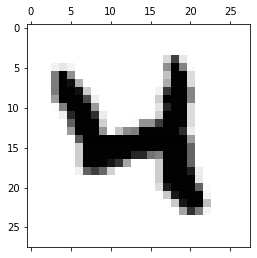

... and with label [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.] after to_categorical

X_train shape: (60000, 784)
Y_train shape: (60000, 10)


In [19]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
seed=0
np.random.seed(seed) # fix random seed
tf.random.set_seed(seed)

from keras.datasets import mnist

# input image dimensions
img_rows, img_cols = 28, 28 # number of pixels 
# output
num_classes = 10 # 10 digits

# the data, split between train and test sets
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

print('X_train shape:', X_train.shape)
print('Y_train shape:', Y_train.shape)

# reshape data, it could depend on Keras backend
X_train = X_train.reshape(X_train.shape[0], img_rows*img_cols)
X_test = X_test.reshape(X_test.shape[0], img_rows*img_cols)
print('X_train shape:', X_train.shape)
print('X_test shape:', X_test.shape)
print()

# cast floats to single precision
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# rescale data in interval [0,1]
X_train /= 255
X_test /= 255

# look at an example of data point
print('an example of a data point with label', Y_train[20])
# matshow: display a matrix in a new figure window
plt.matshow(X_train[20,:].reshape(28,28),cmap='binary')
plt.show()

# convert class vectors to binary class matrices, e.g. for use with categorical_crossentropy
Y_train = keras.utils.to_categorical(Y_train, num_classes)
Y_test = keras.utils.to_categorical(Y_test, num_classes)
print('... and with label', Y_train[20], 'after to_categorical')
print()
print('X_train shape:', X_train.shape)
print('Y_train shape:', Y_train.shape)

In [20]:
from keras.models import Sequential
from keras.layers import Dense, Dropout

def create_DNN():
    # instantiate model
    model = Sequential()
    # add a dense all-to-all relu layer
    model.add(Dense(400,input_shape=(img_rows*img_cols,), activation='relu'))
    # add a dense all-to-all relu layer
    model.add(Dense(100, activation='relu'))
    # apply dropout with rate 0.5
    model.add(Dropout(0.5))  
    # soft-max layer
    model.add(Dense(num_classes, activation='softmax'))
    
    return model

print('Model architecture created successfully!')

Model architecture created successfully!


In [21]:
from tensorflow.keras.optimizers import SGD, Adam, RMSprop, Adagrad, Adadelta, Adam, Adamax, Nadam
#from tensorflow.keras.utils import get_custom_objects

def compile_model(my_optimizer):
    # create the model
    model=create_DNN()
    # compile the model
    model.compile(loss=keras.losses.categorical_crossentropy,
                  optimizer=my_optimizer,
                  metrics=['acc'])
    return model

print('Model compiled successfully and ready to be trained.')

Model compiled successfully and ready to be trained.


## <span style="color:green"> Exercise 12.1

We now test our DNN on unseen data with different optimizers to see the performance.

I experimented a bit on the number of epochs and found a good result for 15 epochs.

In [22]:
# training parameters
batch_size = 32
epochs = 15

def do_model_DNN(my_optim):

  # create the deep neural net
  model_DNN = compile_model(my_optim)

  # train DNN and store training info in history
  history = model_DNN.fit(X_train, Y_train,
            batch_size=batch_size,
            epochs=epochs,
            verbose=1,
            validation_data=(X_test, Y_test))
  print('\n\n')

  # evaluate model
  score = model_DNN.evaluate(X_test, Y_test, verbose=1)

  # print performance
  print()
  print('Test loss:', score[0])
  print('Test accuracy:', score[1])

  # look into training history

  # summarize history for accuracy
  plt.plot(history.history['acc'])
  plt.plot(history.history['val_acc'])
  plt.ylabel('model accuracy')
  plt.xlabel('epoch')
  plt.legend(['train', 'test'], loc='best')
  plt.show()

  # summarize history for loss
  plt.plot(history.history['loss'])
  plt.plot(history.history['val_loss'])
  plt.ylabel('model loss')
  plt.xlabel('epoch')
  plt.legend(['train', 'test'], loc='best')
  plt.show()
 
  predictions = model_DNN.predict(X_test)
  new_X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols,1)
  
  plt.figure(figsize=(22, 15)) 
  for i in range(15):    
      ax = plt.subplot(2, 15, i + 1)    
      plt.imshow(new_X_test[i, :, :, 0], cmap='gray')    
      
      plt.title("Digit: {}\nPredicted:{}".format(np.argmax(Y_test[i]), np.argmax(predictions[i])))    
      plt.axis('off') 
  plt.show()

  return model_DNN

### Optimizer: Stochastic gradient descent 
We start training our DNN using the "sgd" optimizer.

Epoch 1/15
1875/1875 [==============================] - 10s 5ms/step - loss: 0.7572 - acc: 0.7766 - val_loss: 0.3117 - val_acc: 0.9142
Epoch 2/15
1875/1875 [==============================] - 10s 5ms/step - loss: 0.3801 - acc: 0.8911 - val_loss: 0.2399 - val_acc: 0.9311
Epoch 3/15
1875/1875 [==============================] - 10s 5ms/step - loss: 0.3091 - acc: 0.9128 - val_loss: 0.1981 - val_acc: 0.9413
Epoch 4/15
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2651 - acc: 0.9248 - val_loss: 0.1720 - val_acc: 0.9486
Epoch 5/15
1875/1875 [==============================] - 11s 6ms/step - loss: 0.2338 - acc: 0.9341 - val_loss: 0.1571 - val_acc: 0.9521
Epoch 6/15
1875/1875 [==============================] - 11s 6ms/step - loss: 0.2102 - acc: 0.9408 - val_loss: 0.1415 - val_acc: 0.9566
Epoch 7/15
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1904 - acc: 0.9459 - val_loss: 0.1277 - val_acc: 0.9598
Epoch 8/15
1875/1875 [==============================] - 1

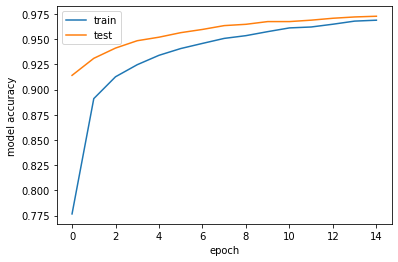

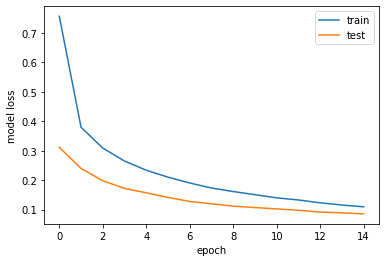

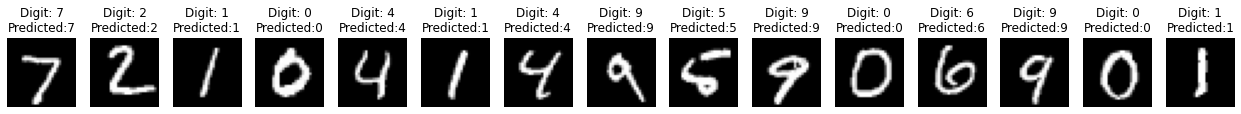

In [16]:
# training parameters
batch_size = 32
epochs = 15
my_optimizer = 'sgd'

sgd_model_DNN = do_model_DNN(my_optimizer)

The results are optimal: the "model accuracy" and "model loss" graphs confirm the good performance of the training, and the network is able to correctly predict all 15 of the proposed numbers.

We see that for the accuracy model the test is better than the train.
That's because Dropout, during training, slices off some artificial neurons, thus, training accuracy suffers.

Instead, for the loss model the test is better than the train, We can explain that saying that Dropout, during testing, turns itself off and allows all of the ‘weak classifiers’ in the neural network to be used. Thus, testing accuracy improves with respect to training accuracy.


### Optimizer: Adam

Epoch 1/15
1875/1875 [==============================] - 12s 6ms/step - loss: 0.2821 - acc: 0.9171 - val_loss: 0.1187 - val_acc: 0.9625
Epoch 2/15
1875/1875 [==============================] - 11s 6ms/step - loss: 0.1241 - acc: 0.9649 - val_loss: 0.0909 - val_acc: 0.9727
Epoch 3/15
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0892 - acc: 0.9744 - val_loss: 0.0850 - val_acc: 0.9746
Epoch 4/15
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0697 - acc: 0.9795 - val_loss: 0.0784 - val_acc: 0.9757
Epoch 5/15
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0574 - acc: 0.9831 - val_loss: 0.0760 - val_acc: 0.9785
Epoch 6/15
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0484 - acc: 0.9849 - val_loss: 0.0758 - val_acc: 0.9806
Epoch 7/15
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0401 - acc: 0.9871 - val_loss: 0.0875 - val_acc: 0.9777
Epoch 8/15
1875/1875 [==============================] -

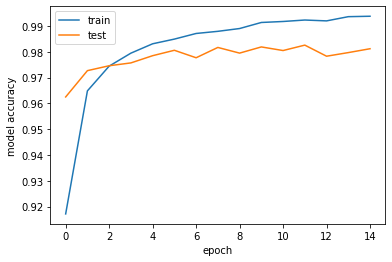

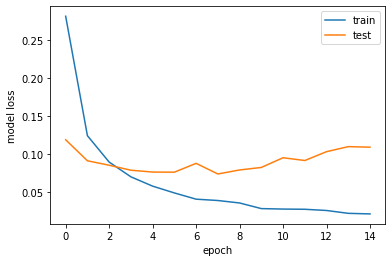

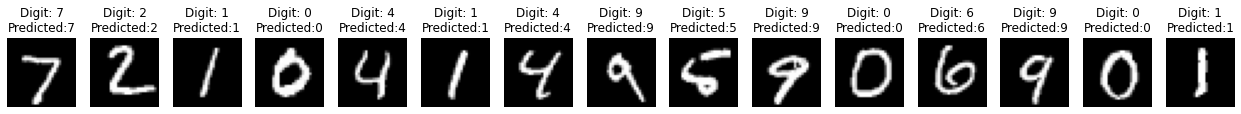

In [23]:
# training parameters
batch_size = 32
epochs = 15
my_optimizer = 'adam'

adam_model_DNN = do_model_DNN(my_optimizer)

The network with the "Adam" optimizer also works very well: in fact, it manages to correctly predict all the proposed numbers. 

If we compare the minimum value of the train loss for the "Adam" case and the "sgd" case we see that for the former we have a factor of 10 less. 
This makes us think that the Adam optimizer is better.

The behavior of the loss and accuracy functions, however, is different: the accuracy of the train data exceeds that of the test data, and the loss function reaches a lower minimum for the train data than for the test data. 
This behavior suggests that Dropout works differently with Adam. 
It could be due to the fact that the Adam optimizer is a kind of momentum optimizer (specifically, it tracks the first and second moments of the updates), so an update will still occur for all model parameters even though dropout is present.

### Optimizer: Adagrad

Epoch 1/15
1875/1875 [==============================] - 12s 6ms/step - loss: 1.2764 - acc: 0.6297 - val_loss: 0.6232 - val_acc: 0.8646
Epoch 2/15
1875/1875 [==============================] - 12s 6ms/step - loss: 0.6975 - acc: 0.8004 - val_loss: 0.4423 - val_acc: 0.8927
Epoch 3/15
1875/1875 [==============================] - 11s 6ms/step - loss: 0.5705 - acc: 0.8354 - val_loss: 0.3765 - val_acc: 0.9013
Epoch 4/15
1875/1875 [==============================] - 10s 5ms/step - loss: 0.5097 - acc: 0.8532 - val_loss: 0.3400 - val_acc: 0.9102
Epoch 5/15
1875/1875 [==============================] - 11s 6ms/step - loss: 0.4676 - acc: 0.8669 - val_loss: 0.3162 - val_acc: 0.9140
Epoch 6/15
1875/1875 [==============================] - 10s 5ms/step - loss: 0.4428 - acc: 0.8734 - val_loss: 0.2986 - val_acc: 0.9186
Epoch 7/15
1875/1875 [==============================] - 11s 6ms/step - loss: 0.4163 - acc: 0.8826 - val_loss: 0.2837 - val_acc: 0.9218
Epoch 8/15
1875/1875 [==============================] -

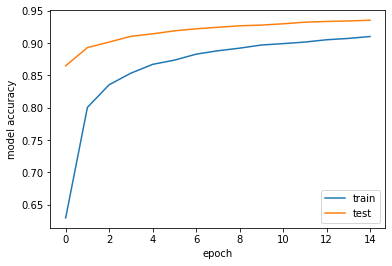

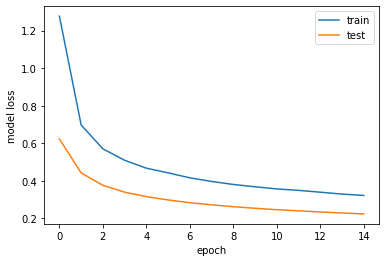

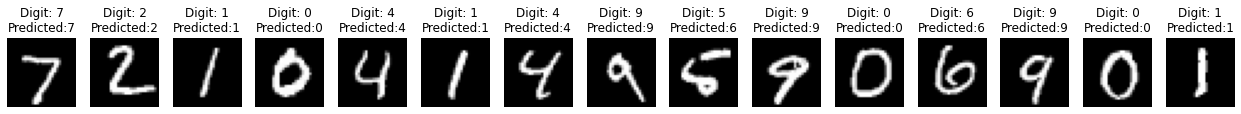

In [25]:
# training parameters
batch_size = 32
epochs = 15
my_optimizer = 'adagrad'

adagrad_model_DNN = do_model_DNN(my_optimizer)

The Adagrad method is less effective than Adam but predicts all but one number well. The sample it fails to detect, however, is a very poorly written number five and looks very much like a six ( value predicted by the network).

Looking at the loss and accuracy models we can conclude that the model with Adagrad optimizer is very similar to the model with SGD


### Optimizer: Adadelta

Epoch 1/15
1875/1875 [==============================] - 13s 7ms/step - loss: 2.2665 - acc: 0.1530 - val_loss: 2.1118 - val_acc: 0.2787
Epoch 2/15
1875/1875 [==============================] - 12s 6ms/step - loss: 2.0761 - acc: 0.2642 - val_loss: 1.9305 - val_acc: 0.4377
Epoch 3/15
1875/1875 [==============================] - 12s 6ms/step - loss: 1.9138 - acc: 0.3739 - val_loss: 1.7616 - val_acc: 0.5811
Epoch 4/15
1875/1875 [==============================] - 11s 6ms/step - loss: 1.7668 - acc: 0.4570 - val_loss: 1.6040 - val_acc: 0.6629
Epoch 5/15
1875/1875 [==============================] - 12s 6ms/step - loss: 1.6304 - acc: 0.5200 - val_loss: 1.4582 - val_acc: 0.7092
Epoch 6/15
1875/1875 [==============================] - 12s 6ms/step - loss: 1.5098 - acc: 0.5653 - val_loss: 1.3270 - val_acc: 0.7421
Epoch 7/15
1875/1875 [==============================] - 12s 7ms/step - loss: 1.4031 - acc: 0.6011 - val_loss: 1.2106 - val_acc: 0.7702
Epoch 8/15
1875/1875 [==============================] -

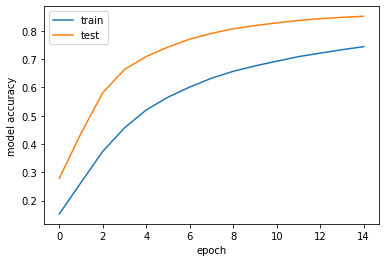

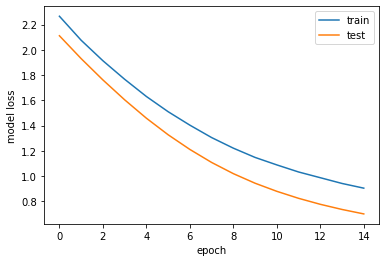

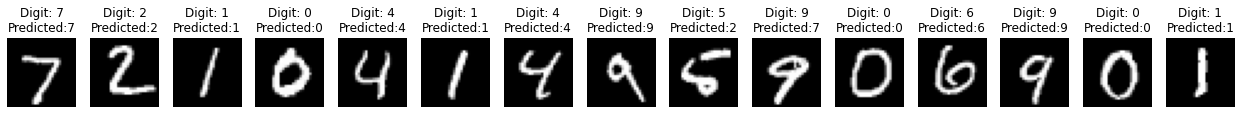

In [26]:
# training parameters
batch_size = 32
epochs = 15
my_optimizer = 'adadelta'

do_model_DNN(my_optimizer)

The Adadelta optimizer fails on the prediction of 2 digits, and returns worse loss and accuracy values than previous optimizers.

### Optimizer: Nadam

Epoch 1/15
1875/1875 [==============================] - 22s 11ms/step - loss: 0.2767 - acc: 0.9188 - val_loss: 0.1058 - val_acc: 0.9656
Epoch 2/15
1875/1875 [==============================] - 19s 10ms/step - loss: 0.1209 - acc: 0.9651 - val_loss: 0.0972 - val_acc: 0.9692
Epoch 3/15
1875/1875 [==============================] - 17s 9ms/step - loss: 0.0876 - acc: 0.9741 - val_loss: 0.0781 - val_acc: 0.9755
Epoch 4/15
1875/1875 [==============================] - 17s 9ms/step - loss: 0.0677 - acc: 0.9790 - val_loss: 0.0758 - val_acc: 0.9784
Epoch 5/15
1875/1875 [==============================] - 19s 10ms/step - loss: 0.0562 - acc: 0.9831 - val_loss: 0.0703 - val_acc: 0.9780
Epoch 6/15
1875/1875 [==============================] - 20s 11ms/step - loss: 0.0468 - acc: 0.9859 - val_loss: 0.0901 - val_acc: 0.9762
Epoch 7/15
1875/1875 [==============================] - 18s 10ms/step - loss: 0.0419 - acc: 0.9870 - val_loss: 0.0772 - val_acc: 0.9806
Epoch 8/15
1875/1875 [============================

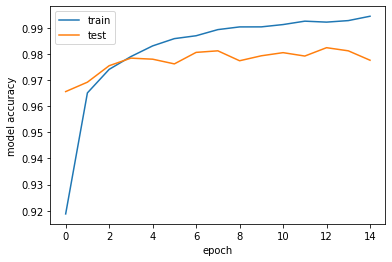

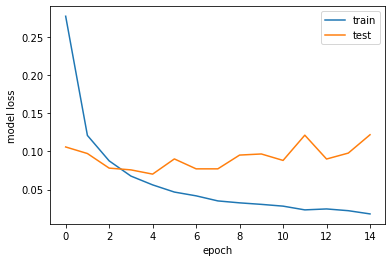

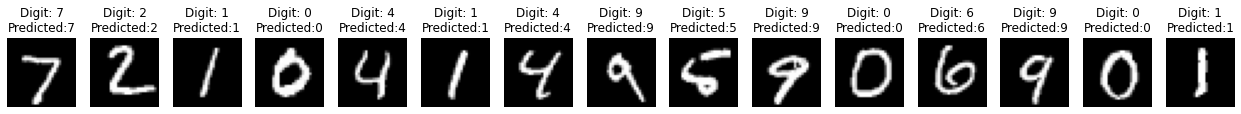

In [27]:
# training parameters
batch_size = 32
epochs = 15
my_optimizer = 'Nadam'

do_model_DNN(my_optimizer)

Nadam optimizer returns very good results, very similar to Adam


## <span style="color:green"> Exercise 12.2

We now want to take advantage from the fact that in every one of the hand-written digits there are local spatial correlations between the pixels, but also translational invariance and use it to improve the performance of our classification model.

So we want to go and create a Convolutional Neural Network.

In the next mirror we perform a reshape of the data, so that we can use convolutional layers for our network.

In [29]:
from keras.layers import Flatten, Conv2D, MaxPooling2D

    
print('starting X_train shape:', X_train.shape)
print('strting Y_train shape:', Y_train.shape)
print()

# reshape data, depending on Keras backend
if keras.backend.image_data_format() == 'channels_first':
    X_train = X_train.reshape(X_train.shape[0], 1, img_rows, img_cols)
    X_test = X_test.reshape(X_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
    X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)

    input_shape = (img_rows, img_cols, 1)
    
print('X_train shape:', X_train.shape)
print('Y_train shape:', Y_train.shape)
print()
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

starting X_train shape: (60000, 784)
strting Y_train shape: (60000, 10)

X_train shape: (60000, 28, 28, 1)
Y_train shape: (60000, 10)

60000 train samples
10000 test samples


We add to the old DNN architecture used in exercise $12.1$ a sequence of Conv2D() and MaxPooling2D() type layers and a Flatten layer.

Based on the previous results we decide to use the Adam optimizer.

In [40]:
def create_CNN():
    # instantiate model
    model = Sequential()
    # add first convolutional layer with 10 filters (dimensionality of output space)
    model.add(Conv2D(10, kernel_size=(5, 5), activation='relu',input_shape=input_shape))                
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Conv2D(5,(5,5), activation = 'relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.5))

    model.add(Flatten())

    model.add(Dense(400, activation='relu'))
    # add a dense all-to-all relu layer
    model.add(Dense(100, activation='relu'))
    # apply dropout with rate 0.5
    model.add(Dropout(0.5))  
    # soft-max layer
    model.add(Dense(num_classes, activation='softmax'))


    
    # compile the model
    model.compile(loss=keras.losses.categorical_crossentropy,
                  optimizer='Adam',
                  metrics=['acc'])
    model.summary()
    return model


In [43]:
# training parameters
batch_size = 32
epochs = 7

# create the deep conv net
model_CNN=create_CNN()

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 24, 24, 10)        260       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 12, 12, 10)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 8, 8, 5)           1255      
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 4, 4, 5)          0         
 2D)                                                             
                                                                 
 dropout_17 (Dropout)        (None, 4, 4, 5)           0         
                                                                 
 flatten_2 (Flatten)         (None, 80)              

In [44]:
# train CNN
history = model_CNN.fit(X_train,Y_train,
            batch_size=batch_size,
            epochs=epochs,
            verbose=1,
            validation_data= (X_test,Y_test) )

Epoch 1/7
1875/1875 [==============================] - 38s 20ms/step - loss: 0.5740 - acc: 0.8182 - val_loss: 0.1226 - val_acc: 0.9646
Epoch 2/7
1875/1875 [==============================] - 37s 20ms/step - loss: 0.3163 - acc: 0.9031 - val_loss: 0.0901 - val_acc: 0.9723
Epoch 3/7
1875/1875 [==============================] - 38s 20ms/step - loss: 0.2609 - acc: 0.9218 - val_loss: 0.0841 - val_acc: 0.9744
Epoch 4/7
1875/1875 [==============================] - 37s 20ms/step - loss: 0.2365 - acc: 0.9289 - val_loss: 0.0663 - val_acc: 0.9809
Epoch 5/7
1875/1875 [==============================] - 37s 19ms/step - loss: 0.2142 - acc: 0.9368 - val_loss: 0.0675 - val_acc: 0.9805
Epoch 6/7
1875/1875 [==============================] - 37s 20ms/step - loss: 0.2006 - acc: 0.9394 - val_loss: 0.0639 - val_acc: 0.9819
Epoch 7/7
1875/1875 [==============================] - 38s 20ms/step - loss: 0.1888 - acc: 0.9430 - val_loss: 0.0620 - val_acc: 0.9845


313/313 [==============================] - 2s 8ms/step - loss: 0.0620 - acc: 0.9845

Test loss: 0.06204168125987053
Test accuracy: 0.984499990940094


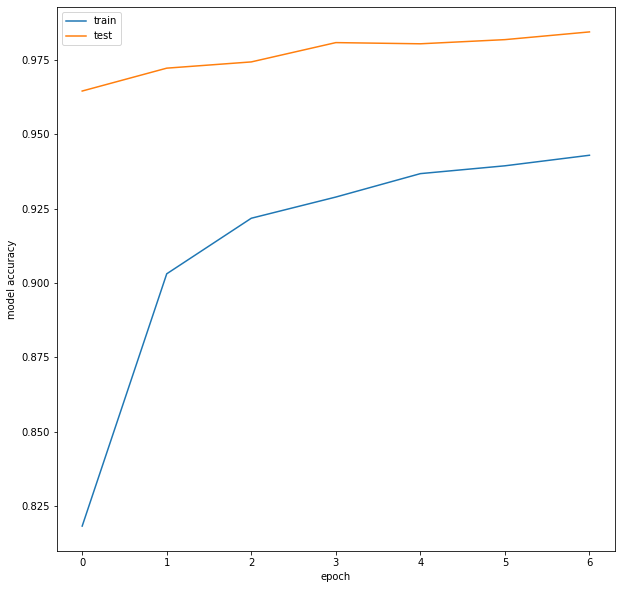

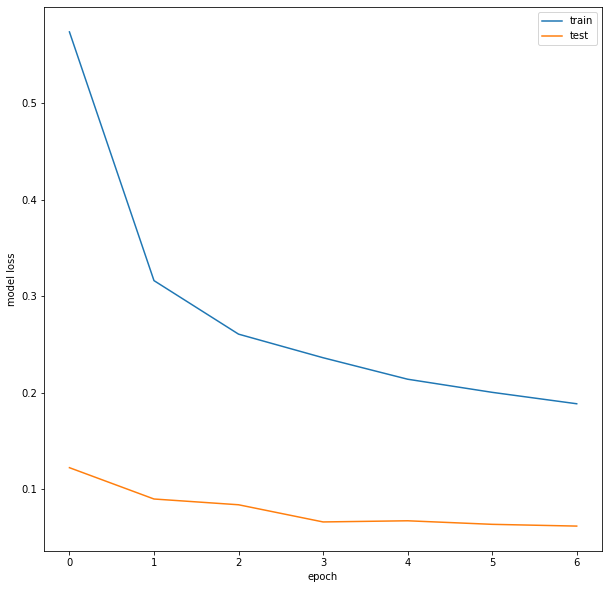

In [45]:
# evaluate model
score = model_CNN.evaluate(X_test,Y_test, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

fig = plt.figure(figsize = (10,10))
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.ylabel('model accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()

fig = plt.figure(figsize = (10,10))
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('model loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()
 

The accuracy and loss functions confirms the goodnes of the model. We can test it on our data.

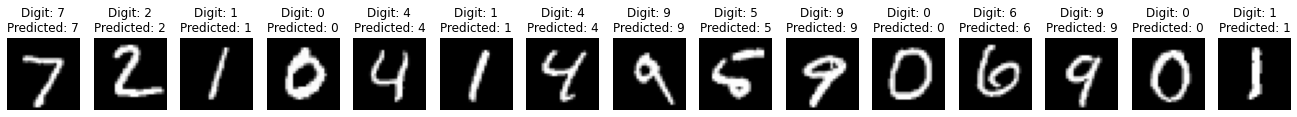

In [47]:
#X_test = X_test.reshape(X_test.shape[0], img_rows*img_cols)
predictions = model_CNN.predict(X_test)

X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols,1)

plt.figure(figsize=(23, 15)) 
for i in range(15):    
    ax = plt.subplot(2, 15, i + 1)    
    plt.imshow(X_test[i, :, :, 0], cmap='gray')    
    plt.title("Digit: {}\nPredicted: {}".format(np.argmax(Y_test[i]), np.argmax(predictions[i])))    
    plt.axis('off') 
plt.show()

## <span style="color:green"> Exercise 12.3

We now try to test our CNN on the numbers 0 to 9 written by me. 
I tried to "annoy" the network a bit by writing the numbers slightly differently than the style found in the MNIST data set to test the efficiency of the network.

In [52]:
from google.colab import files   
uploaded = files.upload()


Saving 6.png to 6.png


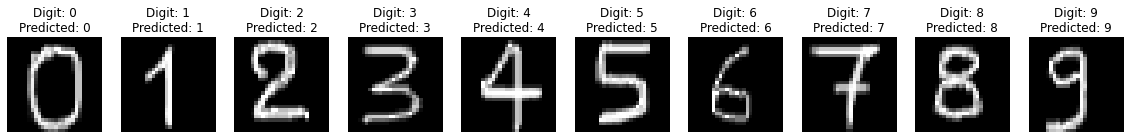

In [53]:
from PIL import Image
import os



fig = plt.figure(figsize =(20,8))

for number in range(10) :
  #charge and prepare my image
  digit_filename = str(number)+'.png'
  digit_in = Image.open(digit_filename).convert('L') #ON GOOGLE COLAB INSERT THE NAME OF THE UPLOADED FILE

  ydim, xdim = digit_in.size
  #print("Image size: "+str(xdim)+"x"+str(ydim))
  pix=digit_in.load();
  data = np.zeros((xdim, ydim))
  for j in range(ydim):
      for i in range(xdim):
          data[i,j]=pix[j,i]

  data /= 255
  data = data.reshape(1,xdim*ydim)

  if keras.backend.image_data_format() == 'channels_first':
      data = data.reshape(data.shape[0], 1, img_rows, img_cols)
      input_shape = (1, img_rows, img_cols)
  else:
      data = data.reshape(data.shape[0], img_rows, img_cols, 1)
      input_shape = (img_rows, img_cols, 1)

  predict = model_CNN.predict(data)
  ax = plt.subplot(2, 10, number + 1)    
  data = data.reshape(xdim,ydim) 
  plt.imshow(data, cmap='gray')    
  plt.title("Digit: {}\nPredicted: {}".format(number,np.argmax(predict)))
  plt.axis('off') 

plt.show()




The network was able to correctly predict all 10 figures! 

To better verify how CNN performs better than DNN for problems of this type, let us try to analyze the figures written by me with the DNN model with optimizer Adam from exercise $12.1$ .

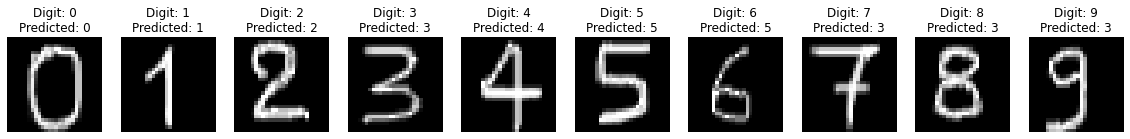

In [54]:

fig = plt.figure(figsize =(20,8))

for number in range(10) :
  #charge and prepare my image
  digit_filename = str(number)+'.png'
  digit_in = Image.open(digit_filename).convert('L') #ON GOOGLE COLAB INSERT THE NAME OF THE UPLOADED FILE

  ydim, xdim = digit_in.size
  #print("Image size: "+str(xdim)+"x"+str(ydim))
  pix=digit_in.load();
  data = np.zeros((xdim, ydim))
  for j in range(ydim):
      for i in range(xdim):
          data[i,j]=pix[j,i]

  data /= 255
  data = data.reshape(1,xdim*ydim)

 

  predict = adam_model_DNN.predict(data)
  ax = plt.subplot(2, 10, number + 1)    
  data = data.reshape(xdim,ydim) 
  plt.imshow(data, cmap='gray')    
  plt.title("Digit: {}\nPredicted: {}".format(number,np.argmax(predict)))
  plt.axis('off') 

plt.show()




As we can see, the DNN got the last four digits wrong: with the exception of the number 8, the digits 6,7 and 9 are written in a different way from the data the network trains on. Therefore, we are not particularly surprised that "she" wasn't able to predict them.

To conclude, we analyze 3 flipped numbers in order to show, as in the previous Notebook, how a supervised neural network is incapable of predicting data in areas outside the training range.

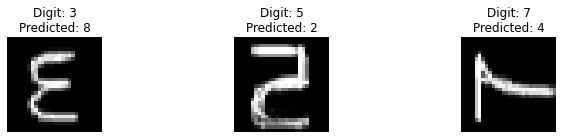

In [ ]:
from PIL import Image
import os

fig = plt.figure(figsize =(20,8))

num =[3,5,7]

for number in num :
  #charge and prepare my image
  digit_filename = str(number)+'_rev.png'
  digit_in = Image.open(digit_filename).convert('L') #ON GOOGLE COLAB INSERT THE NAME OF THE UPLOADED FILE

  ydim, xdim = digit_in.size
  #print("Image size: "+str(xdim)+"x"+str(ydim))
  pix=digit_in.load();
  data = np.zeros((xdim, ydim))
  for j in range(ydim):
      for i in range(xdim):
          data[i,j]=pix[j,i]

  data /= 255
  data = data.reshape(1,xdim*ydim)

  if keras.backend.image_data_format() == 'channels_first':
      data = data.reshape(data.shape[0], 1, img_rows, img_cols)
      input_shape = (1, img_rows, img_cols)
  else:
      data = data.reshape(data.shape[0], img_rows, img_cols, 1)
      input_shape = (img_rows, img_cols, 1)

  predict = model_CNN.predict(data)
  ax = plt.subplot(2, 10, number + 1)    
  data = data.reshape(xdim,ydim) 
  plt.imshow(data, cmap='gray')    
  plt.title("Digit: {}\nPredicted: {}".format(number,np.argmax(predict)))
  plt.axis('off') 

plt.show()